In [2]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.shape

(200, 6)

In [5]:
#x=df[df.columns.drop('Drug')]
#x.head()

In [6]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [7]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1]=le_sex.transform(x[:,1])

le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])

le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 


In [12]:
y=df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [14]:
#train/test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=3)

In [20]:
print(f'xtrain.shape={xtrain.shape} \n ytrain.shape={ytrain.shape}')
print(f'xtest.shape={xtest.shape} \n ytest.shape={ytest.shape}')


xtrain.shape=(140, 5) 
 ytrain.shape=(140,)
xtest.shape=(60, 5) 
 ytest.shape=(60,)


In [21]:
drugTree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
drugTree.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [25]:
predtree=drugTree.predict(xtest)
print(predtree[0:5])
print(ytest[0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [26]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy",metrics.accuracy_score(ytest,predtree))

DecisionTree's Accuracy 0.9833333333333333


In [34]:
import matplotlib.pyplot as plt
from sklearn import tree

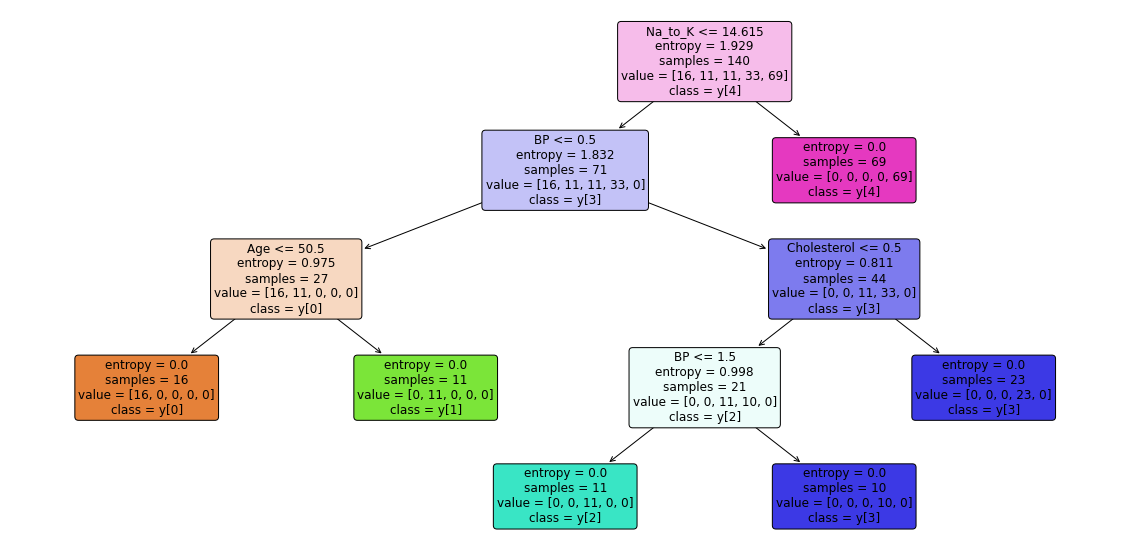

In [42]:
featureNames = df.columns[0:5]
plt.figure(figsize=(20, 10))
tree.plot_tree(
    drugTree,
    feature_names=featureNames,
    class_names=True,
    rounded=True,
    filled=True,
    fontsize=12 )  

plt.axis('off')

plt.savefig("drug_tree.png",bbox_inches="tight")
plt.show()